# GIS For License Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

import pandas as pd

## Licensing Data
* get data with address
* count the occurance of address, so to know how many businesses each address has
* save to csv to add column name and prepare for merge

In [2]:
html = "https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses/r5kz-chrr"
license = pd.read_csv("Business_Licenses.csv", usecols = ["APPLICATION CREATED DATE", "BUSINESS ACTIVITY", "APPLICATION TYPE", "ADDRESS", "LOCATION"],low_memory = False)
license.dropna(inplace = True)
license.head(5)

,ADDRESS,BUSINESS ACTIVITY,APPLICATION TYPE,APPLICATION CREATED DATE,LOCATION
5,5722 S WOOD ST 1ST,Home Repair Services (Home Occ),ISSUE,8/30/16,"(41.78961679000226, -87.66947199630827)"
7,201 E RANDOLPH ST,Organizer of Vendors That Sell for Retail at a...,ISSUE,8/30/16,"(41.884167384339136, -87.62225004170132)"
11,2705 W 51ST ST 1ST,Retail Sales of General Merchandise,ISSUE,8/29/16,"(41.80091646021564, -87.69179951881104)"
12,1543 N WELLS ST 1ST,Sale of Food Prepared Onsite Without Dining Area,C_LOC,8/4/16,"(41.91040819050054, -87.63454009171004)"
24,3035 N MILWAUKEE AVE 1,Provide Waxing Services | Skincare Services,ISSUE,8/30/16,"(41.936432172755346, -87.71924410911548)"


In [72]:
license.to_csv('license2.csv')

In [85]:
license2 = pd.read_csv('license2.csv')

In [4]:
license2.head()

,Unnamed: 0,ADDRESS,BUSINESS ACTIVITY,APPLICATION TYPE,APPLICATION CREATED DATE,LOCATION
0,5,5722 S WOOD ST 1ST,Home Repair Services (Home Occ),ISSUE,8/30/16,"(41.78961679000226, -87.66947199630827)"
1,7,201 E RANDOLPH ST,Organizer of Vendors That Sell for Retail at a...,ISSUE,8/30/16,"(41.884167384339136, -87.62225004170132)"
2,11,2705 W 51ST ST 1ST,Retail Sales of General Merchandise,ISSUE,8/29/16,"(41.80091646021564, -87.69179951881104)"
3,12,1543 N WELLS ST 1ST,Sale of Food Prepared Onsite Without Dining Area,C_LOC,8/4/16,"(41.91040819050054, -87.63454009171004)"
4,24,3035 N MILWAUKEE AVE 1,Provide Waxing Services | Skincare Services,ISSUE,8/30/16,"(41.936432172755346, -87.71924410911548)"


In [113]:
address_count = license['ADDRESS'].value_counts()
address_count.head()

50 W WASHINGTON ST    533
2700 S ROCKWELL ST    439
3200 N HALSTED ST     257
1501 W RANDOLPH ST    252
4000 N LINCOLN AVE    246
Name: ADDRESS, dtype: int64

In [119]:
address_count.to_csv('ACOUNT')

In [120]:
address_count = pd.read_csv('ACOUNT.csv')

In [125]:
column = ["ADDRESS","COUNT"]
address_count.columns = column

In [126]:
address_count.head()

,ADDRESS,COUNT
0,2700 S ROCKWELL ST,439
1,3200 N HALSTED ST,257
2,1501 W RANDOLPH ST,252
3,4000 N LINCOLN AVE,246
4,1600 N WELLS ST,233


## Number of Businesses in Chicago Ward Map
* read the ward map
* merge the ward map with the address count of the licensing data
* plot the the map and interactive web map

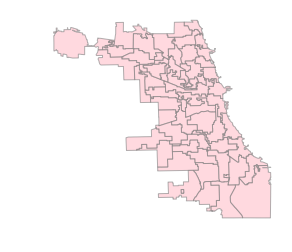

In [14]:
geo_df = gpd.read_file("Chicago-Wards.shp")
geo_df.plot(facecolor = "pink", alpha = 0.6, edgecolor = "grey").set_axis_off()

In [127]:
geo_merge = geo_df.join(address_count, how = "inner")

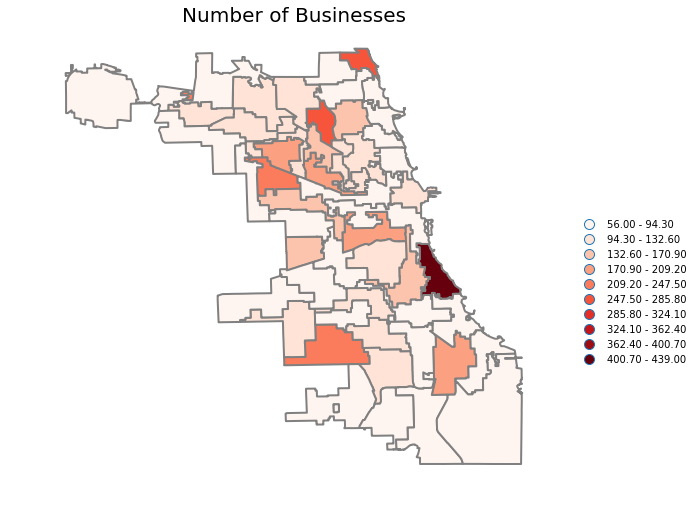

In [128]:
ft = "COUNT"

image = geo_merge
ax = image.plot(column = ft, cmap = "Reds", scheme = "equal_interval", k = 10, legend = True,
                 alpha = 1, linewidth = 2, edgecolor = "grey", figsize = (9, 9))

ax.set_title("Number of Businesses", fontsize = 20, y = 1)
ax.set_axis_off()

ax.get_legend().set_bbox_to_anchor((1.3, 0.6))
ax.get_legend().get_frame().set_linewidth(0)

In [134]:
import folium

m = folium.Map([40, -98], 
               tiles='cartodbpositron', 
               zoom_start=4, max_zoom=14, min_zoom=4)

ft = "COUNT"
colormap = folium.LinearColormap(("white", "red", "darkred"), 
                                 vmin = geo_merge[ft].min(), 
                                 vmax = geo_merge[ft].max(),
                                 caption = ft)

colormap.add_to(m)

folium.GeoJson(geo_merge,
               style_function = lambda feature: { 
                  'fillColor': colormap(feature['properties'][ft]),
                  "color" : "grey", "weight" : 1, "fillOpacity" : 0.4
               }).add_to(m)

m.save("COUNT.html")

m